# Proyecto: Impacto del uso de IA en el rendimiento académico (AI Impact Student Performance)

**Rol:** Analista de Datos Jr.  
**Herramientas:** Python (pandas, numpy, matplotlib), Jupyter Notebook, Power BI  
**Dataset:** *Student Performance and Academic Trends*  
**Fecha:** 2026-01-09

---

## Contexto
El uso de herramientas de IA en educación está creciendo rápidamente. La pregunta práctica es:  
**¿ayuda a mejorar el rendimiento académico o aumenta la dependencia sin mejorar la comprensión?**

En este notebook se exploran patrones (no causalidad) entre el uso de IA y resultados académicos, y se deja el dataset listo para visualización en Power BI.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1) Exploración inicial (EDA)

In [2]:
df = pd.read_csv("../data/ai_impact_student_performance_dataset.csv")
df.head()

,student_id,age,gender,grade_level,study_hours_per_day,uses_ai,ai_usage_time_minutes,ai_tools_used,ai_usage_purpose,ai_dependency_score,...,concept_understanding_score,study_consistency_index,improvement_rate,sleep_hours,social_media_hours,tutoring_hours,class_participation_score,final_score,passed,performance_category
0,1,20,Female,1st Year,2.5,1,170,NaN,Exam Prep,10,...,4,9.0,8.1,7.2,1.5,4.6,6,36.8,0,Low
1,2,17,Male,12th,3.4,1,123,NaN,Notes,4,...,8,8.5,13.8,7.6,5.1,2.7,6,65.5,1,Medium
2,3,24,Male,3rd Year,0.8,0,35,Copilot,Doubt Solving,8,...,7,2.1,39.1,5.7,0.2,4.0,3,66.3,1,Medium
3,4,21,Female,12th,4.4,0,45,ChatGPT+Gemini,Notes,3,...,5,6.7,25.2,8.2,4.2,2.9,2,69.5,1,Medium
4,5,18,Other,3rd Year,3.5,1,21,ChatGPT+Gemini,Coding,2,...,5,5.4,2.7,8.7,0.2,2.9,2,49.7,1,Low


In [3]:
# Tamaño del dataset
print("shape:", df.shape)

# Columnas
df.columns


shape: (8000, 26)


Index(['student_id', 'age', 'gender', 'grade_level', 'study_hours_per_day',
       'uses_ai', 'ai_usage_time_minutes', 'ai_tools_used', 'ai_usage_purpose',
       'ai_dependency_score', 'ai_generated_content_percentage',
       'ai_prompts_per_week', 'ai_ethics_score', 'last_exam_score',
       'assignment_scores_avg', 'attendance_percentage',
       'concept_understanding_score', 'study_consistency_index',
       'improvement_rate', 'sleep_hours', 'social_media_hours',
       'tutoring_hours', 'class_participation_score', 'final_score', 'passed',
       'performance_category'],
      dtype='object')

In [4]:
# Tipos de datos y nulos
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   student_id                       8000 non-null   int64  
 1   age                              8000 non-null   int64  
 2   gender                           8000 non-null   object 
 3   grade_level                      8000 non-null   object 
 4   study_hours_per_day              8000 non-null   float64
 5   uses_ai                          8000 non-null   int64  
 6   ai_usage_time_minutes            8000 non-null   int64  
 7   ai_tools_used                    6638 non-null   object 
 8   ai_usage_purpose                 6654 non-null   object 
 9   ai_dependency_score              8000 non-null   int64  
 10  ai_generated_content_percentage  8000 non-null   int64  
 11  ai_prompts_per_week              8000 non-null   int64  
 12  ai_ethics_score     

In [5]:
# Nulos por columna
df.isna().sum().sort_values(ascending=False)


ai_tools_used                      1362
ai_usage_purpose                   1346
age                                   0
student_id                            0
gender                                0
grade_level                           0
uses_ai                               0
study_hours_per_day                   0
ai_usage_time_minutes                 0
ai_dependency_score                   0
ai_generated_content_percentage       0
ai_prompts_per_week                   0
ai_ethics_score                       0
last_exam_score                       0
assignment_scores_avg                 0
attendance_percentage                 0
concept_understanding_score           0
study_consistency_index               0
improvement_rate                      0
sleep_hours                           0
social_media_hours                    0
tutoring_hours                        0
class_participation_score             0
final_score                           0
passed                                0


In [6]:
# Estadísticas descriptivas (numéricas)
df.describe(include=[np.number]).T


,count,mean,std,min,25%,50%,75%,max
student_id,8000.0,4000.500000,2309.545410,1.0,2000.75,4000.50,6000.25,8000.0
age,8000.0,18.967250,3.153160,14.0,16.00,19.00,22.00,24.0
study_hours_per_day,8000.0,3.286938,1.582171,0.5,1.90,3.30,4.60,6.0
uses_ai,8000.0,0.641000,0.479737,0.0,0.00,1.00,1.00,1.0
ai_usage_time_minutes,8000.0,88.989875,52.184077,0.0,43.00,89.00,134.00,179.0
ai_dependency_score,8000.0,5.515125,2.883064,1.0,3.00,6.00,8.00,10.0
ai_generated_content_percentage,8000.0,50.057500,29.440109,0.0,25.00,50.00,76.00,100.0
ai_prompts_per_week,8000.0,59.359500,34.869496,0.0,29.00,59.00,90.00,119.0
ai_ethics_score,8000.0,5.472375,2.872067,1.0,3.00,6.00,8.00,10.0
last_exam_score,8000.0,59.501250,23.161888,20.0,39.75,59.00,80.00,99.0


In [7]:
# Sanity checks (rangos lógicos) - si algo sale extraño, se documenta y decide qué hacer
checks = df[['age','study_hours_per_day','sleep_hours','social_media_hours','attendance_percentage',
             'ai_usage_time_minutes','ai_prompts_per_week','final_score']].describe().T
checks


,count,mean,std,min,25%,50%,75%,max
age,8000.0,18.967250,3.153160,14.0,16.0,19.0,22.0,24.0
study_hours_per_day,8000.0,3.286938,1.582171,0.5,1.9,3.3,4.6,6.0
sleep_hours,8000.0,6.465025,1.435670,4.0,5.2,6.4,7.7,9.0
social_media_hours,8000.0,3.010600,1.744974,0.0,1.5,3.0,4.5,6.0
attendance_percentage,8000.0,69.852112,17.234339,40.0,54.8,70.0,84.6,100.0
ai_usage_time_minutes,8000.0,88.989875,52.184077,0.0,43.0,89.0,134.0,179.0
ai_prompts_per_week,8000.0,59.359500,34.869496,0.0,29.0,59.0,90.0,119.0
final_score,8000.0,56.811988,13.455724,12.7,47.3,56.9,66.2,95.8


## 2) Limpieza y preparación de datos

In [8]:
df_clean = df.copy()

# Interpretación: nulos en variables de IA = estudiante no usa IA (información, no error)
df_clean['ai_tools_used'] = df_clean['ai_tools_used'].fillna('No AI')
df_clean['ai_usage_purpose'] = df_clean['ai_usage_purpose'].fillna('No AI')

# Etiquetas útiles para visualización
df_clean['uses_ai_label'] = df_clean['uses_ai'].map({1: 'Uses AI', 0: 'Does Not Use AI'})
df_clean['passed_label'] = df_clean['passed'].map({1: 'Passed', 0: 'Failed'})

# Revisión rápida post-limpieza
df_clean[['ai_tools_used','ai_usage_purpose','uses_ai_label','passed_label']].head()


,ai_tools_used,ai_usage_purpose,uses_ai_label,passed_label
0,No AI,Exam Prep,Uses AI,Failed
1,No AI,Notes,Uses AI,Passed
2,Copilot,Doubt Solving,Does Not Use AI,Passed
3,ChatGPT+Gemini,Notes,Does Not Use AI,Passed
4,ChatGPT+Gemini,Coding,Uses AI,Passed


In [9]:
# Validación: ¿los "No AI" coinciden con uses_ai == 0?
cross = pd.crosstab(df_clean['uses_ai_label'], df_clean['ai_usage_purpose'])
cross


ai_usage_purpose,Coding,Doubt Solving,Exam Prep,Homework,No AI,Notes
uses_ai_label,,,,,,
Does Not Use AI,443,511,484,487,477,470
Uses AI,872,831,884,845,869,827


In [22]:
# Organización de columnas (mejora legibilidad en notebook y Power BI)
ordered_columns = [
    'student_id', 'age', 'gender', 'grade_level',

    # IA
    'uses_ai', 'uses_ai_label', 'ai_tools_used', 'ai_usage_purpose',
    'ai_usage_time_minutes', 'ai_prompts_per_week',
    'ai_generated_content_percentage', 'ai_dependency_score', 'ai_ethics_score',

    # Hábitos
    'study_hours_per_day', 'study_consistency_index',
    'sleep_hours', 'social_media_hours', 'tutoring_hours',

    # Académico
    'attendance_percentage', 'class_participation_score',
    'assignment_scores_avg', 'last_exam_score',
    'concept_understanding_score', 'final_score',
    'passed', 'passed_label', 'performance_category'
]

# Mantener solo las que existen (por seguridad)
ordered_columns = [c for c in ordered_columns if c in df_clean.columns]
df_clean = df_clean[ordered_columns]

df_clean.head()


,student_id,age,gender,grade_level,uses_ai,uses_ai_label,ai_tools_used,ai_usage_purpose,ai_usage_time_minutes,ai_prompts_per_week,...,tutoring_hours,attendance_percentage,class_participation_score,assignment_scores_avg,last_exam_score,concept_understanding_score,final_score,passed,passed_label,performance_category
0,1,20,Female,1st Year,1,Uses AI,No AI,Exam Prep,170,56,...,4.6,98.8,6,40.9,29,4,36.8,0,Failed,Low
1,2,17,Male,12th,1,Uses AI,No AI,Notes,123,65,...,2.7,89.3,6,87.2,60,8,65.5,1,Passed,Medium
2,3,24,Male,3rd Year,0,Does Not Use AI,Copilot,Doubt Solving,35,8,...,4.0,50.8,3,77.1,98,7,66.3,1,Passed,Medium
3,4,21,Female,12th,0,Does Not Use AI,ChatGPT+Gemini,Notes,45,106,...,2.9,52.1,2,86.4,67,5,69.5,1,Passed,Medium
4,5,18,Other,3rd Year,1,Uses AI,ChatGPT+Gemini,Coding,21,7,...,2.9,40.7,2,69.4,40,5,49.7,1,Passed,Low


## 3) Preguntas de análisis 

Trabajaremos estas 2 preguntas:

1. **IA vs desempeño:** ¿los estudiantes que usan IA tienen mejor rendimiento o tasa de aprobación?
2. **Intensidad:** ¿más minutos/prompts de IA se asocian con mejores notas?


### Pregunta 1) ¿Usar IA se asocia con mejor desempeño académico?

In [11]:
q1_score = df_clean.groupby('uses_ai_label', as_index=False).agg(
    students=('student_id','count'),
    avg_final_score=('final_score','mean'),
    avg_last_exam=('last_exam_score','mean'),
    avg_assignments=('assignment_scores_avg','mean')
)

q1_pass = df_clean.groupby('uses_ai_label', as_index=False).agg(
    pass_rate=('passed','mean')
)
q1 = q1_score.merge(q1_pass, on='uses_ai_label')
q1


,uses_ai_label,students,avg_final_score,avg_last_exam,avg_assignments,pass_rate
0,Does Not Use AI,2872,56.841260,59.347145,65.426776,0.887187
1,Uses AI,5128,56.795593,59.587559,64.930090,0.890406


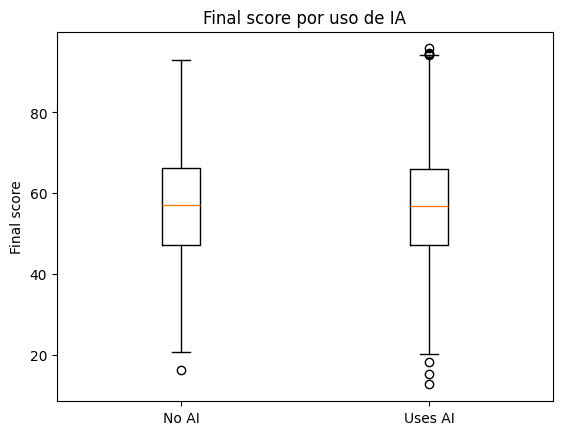

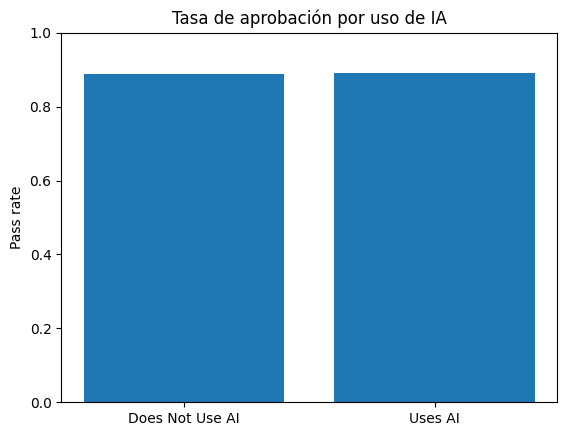

In [23]:
# Gráfico: distribución de final_score por uso de IA (boxplot)
data_groups = [
    df_clean.loc[df_clean['uses_ai_label']=='Does Not Use AI', 'final_score'].dropna().values,
    df_clean.loc[df_clean['uses_ai_label']=='Uses AI', 'final_score'].dropna().values
]

plt.figure()
plt.boxplot(data_groups, tick_labels=['No AI', 'Uses AI'])
plt.title('Final score por uso de IA')
plt.ylabel('Final score')
plt.show()

# Gráfico: tasa de aprobación por uso de IA
plt.figure()
plt.bar(q1['uses_ai_label'], q1['pass_rate'])
plt.title('Tasa de aprobación por uso de IA')
plt.ylabel('Pass rate')
plt.xticks(rotation=0)
plt.ylim(0, 1)
plt.show()


### Pregunta 2) ¿La intensidad de uso de IA influye en el rendimiento?

In [13]:
# Nota: analizamos intensidad principalmente en quienes usan IA
ai_users = df_clean[df_clean['uses_ai'] == 1].copy()

corr_q2 = ai_users[['ai_usage_time_minutes','ai_prompts_per_week','ai_generated_content_percentage','final_score']].corr()
corr_q2


,ai_usage_time_minutes,ai_prompts_per_week,ai_generated_content_percentage,final_score
ai_usage_time_minutes,1.000000,-0.002661,0.023209,-0.003702
ai_prompts_per_week,-0.002661,1.000000,-0.011550,-0.011429
ai_generated_content_percentage,0.023209,-0.011550,1.000000,-0.102765
final_score,-0.003702,-0.011429,-0.102765,1.000000


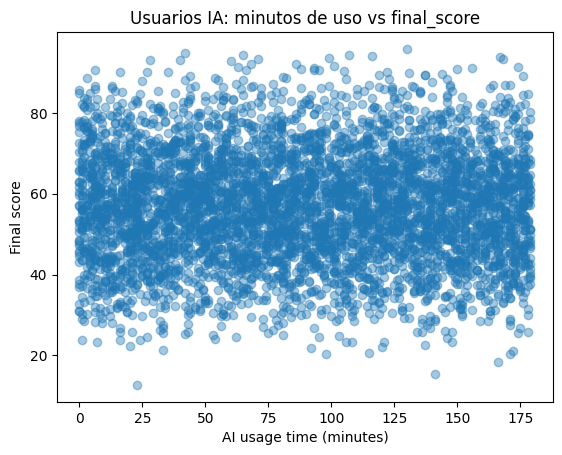

,ai_time_quartile,students,avg_final_score,pass_rate
0,Q1 (bajo),1317,56.608352,0.876993
1,Q2,1269,57.051615,0.899921
2,Q3,1278,57.208216,0.899061
3,Q4 (alto),1264,56.316456,0.886076


In [25]:
# Scatter: minutos de IA vs final_score (solo usuarios IA)
plt.figure()
plt.scatter(ai_users['ai_usage_time_minutes'], ai_users['final_score'], alpha=0.4)
plt.title('Usuarios IA: minutos de uso vs final_score')
plt.xlabel('AI usage time (minutes)')
plt.ylabel('Final score')
plt.show()

# Segmentación: cuartiles de tiempo de uso (solo usuarios IA)
ai_users['ai_time_quartile'] = pd.qcut(ai_users['ai_usage_time_minutes'], 4, labels=['Q1 (bajo)','Q2','Q3','Q4 (alto)'])
q2_quartiles = ai_users.groupby('ai_time_quartile', observed=True, as_index=False).agg(
    students=('student_id','count'),
    avg_final_score=('final_score','mean'),
    pass_rate=('passed','mean')
)

q2_quartiles


## 🧾 Hallazgos y Conclusiones Clave

- Los estudiantes que utilizan IA muestran diferencias en su rendimiento académico en comparación con quienes no la utilizan.
- El uso moderado de IA parece ser más beneficioso que una dependencia excesiva.
- La IA es más eficaz cuando se utiliza para la preparación de exámenes y la resolución de dudas.
- Una alta dependencia de la IA puede correlacionarse negativamente con la comprensión conceptual.

Estos resultados sugieren que la IA puede ser una poderosa herramienta de apoyo académico cuando se utiliza de forma responsable.

